# Classification of Alzheimer's Diseases using Quantification of HippoCampal Volume

### Exploratory Data Analysis - Section 1

This task involves exploratory data analysis of given 3D images including slicing, visualisation, and data understanding strategies.

In [0]:
# Import the following libraries that we will use: nibabel, matplotlib, numpy
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
import os

Asking students to locally install modules will take all the responsibility away from Udacity and towards the student community which would be preferable,in fact. But installing into workspace would be ideal as more or less all students would need the same modules for the given assignment.  



In [4]:
"""
 Load an image and a segmentation mask into variables called image and label
"""

image = nib.load("hippocampus_001.nii.gz")
print(image.shape)


(35, 51, 35)


In [5]:

label = nib.load("hippocampus_001.nii.gz")
print(label.shape)


(35, 51, 35)


We are now going to display the slices from the respective image and label.

In [0]:
def show_slices(slices):
	""" Function to display row of image slices """
	fig, axes = plt.subplots(1, len(slices))
	for i, slice in enumerate(slices):
		axes[i].imshow(slice.T, cmap="gray", origin="lower")

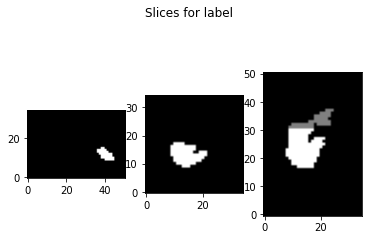

In [7]:
slice_0 = label.get_fdata()[26, :, :]
slice_1 =  label.get_fdata()[:, 30, :]
slice_2 =  label.get_fdata()[:, :, 16]

show_slices([slice_0, slice_1, slice_2])
plt.suptitle("Slices for label")  
plt.show()

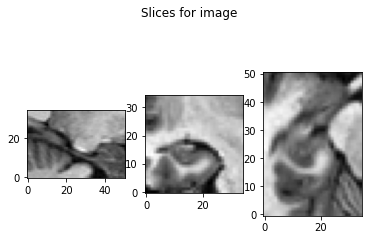

In [8]:
slice_0 = image.get_fdata()[26, :, :]
slice_1 =  image.get_fdata()[:, 30, :]
slice_2 =  image.get_fdata()[:, :, 16]

show_slices([slice_0, slice_1, slice_2])
plt.suptitle("Slices for image")  
plt.show()

Nibabel can present your image data as a Numpy array by calling method get_fdata(). The array will contain a multi-dimensional Numpy array with numerical values representing voxel intensities. In our case, images and labels are 3-dimensional, so get_fdata will return a 3-dimensional array. You can verify this by accessing the .shape attribute. What are the dimensions of the input arrays?

In [9]:

print(image.get_fdata())
print(image.get_fdata().shape)

[[[ 42.  29.  28. ...  95. 100.  98.]
  [ 37.  30.  27. ... 101. 100.  97.]
  [ 30.  27.  27. ... 101.  99.  99.]
  ...
  [101.  93.  90. ...  28.  34.  35.]
  [ 92.  88.  84. ...  41.  39.  44.]
  [ 63.  65.  60. ...  43.  45.  54.]]

 [[ 39.  30.  33. ... 101. 101. 100.]
  [ 38.  30.  31. ... 103. 100. 101.]
  [ 42.  29.  28. ... 103. 106. 100.]
  ...
  [100. 100. 102. ...  22.  33.  36.]
  [ 98.  99. 105. ...  26.  36.  41.]
  [ 91.  90.  90. ...  29.  38.  44.]]

 [[ 43.  35.  38. ... 110. 110.  98.]
  [ 49.  35.  36. ... 105. 106. 100.]
  [ 43.  30.  34. ... 102. 105.  99.]
  ...
  [ 67.  84.  96. ...  17.  27.  35.]
  [ 81.  94.  93. ...  14.  29.  37.]
  [ 98. 102.  97. ...  28.  30.  36.]]

 ...

 [[ 82.  81.  79. ...   8.  12.  18.]
  [ 84.  78.  81. ...   9.  12.  16.]
  [ 81.  81.  81. ...  12.  20.  34.]
  ...
  [ 47.  45.  47. ...  50.  37.  32.]
  [ 38.  36.  37. ...  50.  44.  41.]
  [ 46.  47.  40. ...  52.  50.  51.]]

 [[ 91.  89.  87. ...   7.   5.   6.]
  [ 91.  90.

Using matplotlib, visualize a few slices from the dataset, along with their labels. You can adjust plot sizes like so if you find them too small.


---

This code below acts like a crude volume render. 


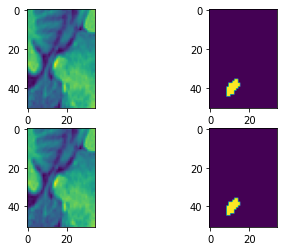

In [10]:
image1 = nib.load("image_001.nii.gz")
label1= nib.load("label_001.nii.gz")
f, axarr = plt.subplots(2,2)
axarr[0,0].imshow(image.get_fdata()[26, :, :])
axarr[0,1].imshow(label1.get_fdata()[26, :, :])
axarr[1,0].imshow(image1.get_fdata()[26, :, :])
axarr[1,1].imshow(label1.get_fdata()[26, :, :])
plt.show()


### Stand out task: 
Visualize a combined view of a label by adding up all values along a dimension. 

(35, 51, 35)


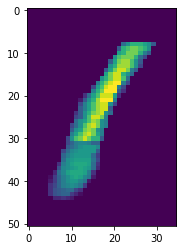

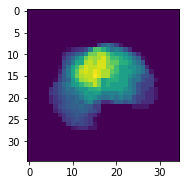

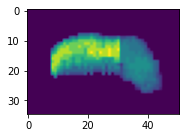

In [11]:
print(image1.get_fdata().shape)
A = label.get_fdata()
dim1 = np.sum(A, axis = 0)
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.imshow(dim1)
plt.show()

dim2 = np.sum(A, axis = 1)
fig = plt.figure()
ax2 = fig.add_subplot(121)
ax2.imshow(dim2)
plt.show()

dim3 = np.sum(A, axis = 2)
fig = plt.figure()
ax3 = fig.add_subplot(121)
ax3.imshow(dim3)
plt.show()

Here is the Slicer Render slicer image, based on this youtube video:https://www.youtube.com/watch?v=MKLWzD0PiIc


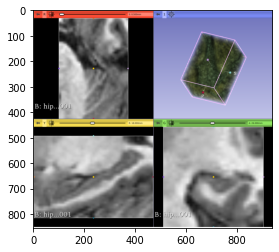

In [12]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img=mpimg.imread('slicer_render.png')
imgplot = plt.imshow(img)
plt.show()

Nibabel supports many imaging formats, NIFTI being just one of them. What format are we dealing with?

In [13]:
print(image.header)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [ 3 35 51 35  1  1  1  1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : uint8
bitpix          : 8
slice_start     : 0
pixdim          : [1. 1. 1. 1. 1. 0. 0. 0.]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b'5.0.10'
aux_file        : b'none'
qform_code      : scanner
sform_code      : scanner
quatern_b       : 0.0
quatern_c       : 0.0
quatern_d       : 0.0
qoffset_x       : 1.0
qoffset_y       : 1.0
qoffset_z       : 1.0
srow_x          : [1. 0. 0. 1.]
srow_y          : [0. 

Answering questions based on the above data: 

---


How many bits per pixel are used? 8

---


What are the units of measurement? xyzt_units

---


The units of measurement for the first 4 dimensions are specified in the field? 10

---


Do we have a regular grid? What are grid spacings?
The grid spacings are as follows:   [1. 1. 1. 1. 1. 0. 0. 0.]

---


What dimensions represent axial, sagittal, and coronal slices? How do you know?the affine attribute gives us more information about the affine
affine: array-like or None, optional. Affine transform for the data. This is used to determine how the data should be sliced for plotting into the sagittal, coronal, and axial view axes. If None, identity is assumed. The aspect ratio of the data are inferred from the affine transform.


In [15]:

np.set_printoptions(precision=3, suppress=True)
# Print the affine
print(image.affine)
print(nib.affines.voxel_sizes(label.affine))

[[1. 0. 0. 1.]
 [0. 1. 0. 1.]
 [0. 0. 1. 1.]
 [0. 0. 0. 1.]]
[1. 1. 1.]


Compute the volume (in mm³) of a hippocampus using one of the labels you've loaded.  You should get a number between ~2200 and ~4500

The above output checks volume across each dimension. To cumulatively do so for all dimensions:

In [ ]:
volume = 0
all_volumes=list()

#load slice for every image
label_slices = [[f,nib.load(os.path.join("/data/TrainingSet/labels/", f))] 
                for f in os.listdir("/data/TrainingSet/labels/")]

def vol(training_label):
    volume = 0
    for i in range(training_label.shape[0]):
        for j in range(training_label.shape[1]):
            for k in range(training_label.shape[2]):
                if (training_label[i][j][k]) != 0:
                    volume+=1
    return volume

for i in range(262): #because there are 262 slices
    v = vol(label_slices[i][1].get_fdata())
    all_volumes.append(v)

all_volumes_nonOutlier = np.array([v for v in all_volumes if (v<4500 and v>2200)])

Plotting a histogram of all all_volumes_nonOutlier in the data 

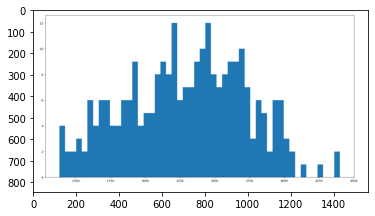

In [6]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img=mpimg.imread('volume.png')
imgplot = plt.imshow(img)
plt.show()


OBSERVATIONS: We found that image 118 has no corresponding label mask and hence, we are forced to remove this image from our dataset. 
Images 010 and 281 have different image and mask dimensions but these can be set. 


The mask seems to have two classes, labeled with values 1 and 2 respectively. If you visualized sagittal or axial views, you might have gotten a good guess of what those are. Class 1 is the anterior segment of the hippocampus and class 2 is the posterior one.

In [0]:
def resize_data(data, shape1, shape2, shape3):
	initial_size_x, initial_size_y, initial_size_z = data.shape[0:3]

	new_size_x = shape1
	new_size_y = shape2
	new_size_z = shape3

	delta_x = initial_size_x / new_size_x
	delta_y = initial_size_y / new_size_y
	delta_z = initial_size_z / new_size_z

	new_data = np.zeros((new_size_x, new_size_y, new_size_z))

	for x, y, z in itertools.product(range(new_size_x), range(new_size_y),range(new_size_z)):
		new_data[x][y][z] = data.get_fdata()[int(x * delta_x)][int(y * delta_y)][int(z * delta_z)]

	return new_data


The cleaned dataset needs to be set to /output/ folder. We are thus resizing images and for compatibility, corresponging labels.

In [0]:
path1 = "/data/TrainingSet/images/"
path2 = "/data/TrainingSet/labels/"
lt1 = os.listdir(path1)
lt2 = os.listdir(path2)

for img in lt1:
	count = [False, False, False]
	im = nib.load(path1 + img)
	la = nib.load(path2 + img)
	val0 = im.get_fdata().shape[0]
	val1 = im.get_fdata().shape[1]
	val2 = im.get_fdata().shape[2]
	if val0 < 35 or val0 > 71:
		new_val0 = np.clip(val0, 35, 71)
		count[0]=True
	if val1 < 35 or val1 > 71:
		new_val1 = np.clip(val1, 35, 71)
		count[1]=True
	if val2 < 35 or val2 > 71:
		new_val2 = np.clip(val2, 35, 71)
		count[2]=True
	print(count)
	if count == [False, False, False]:
		#image is normal
		print("Normal img written")
		os.chdir("/output/images/")
		im.to_filename(img)
		os.chdir("/output/labels/")
		la.to_filename(img)
	elif count == [True, False, False]:
		new_img = resize_data(im, new_val0, val1, val2)
		new_lbl = resize_data(la, new_val0, val1, val2)
		print(img + "resized")
		nibimg = nib.Nifti1Image(new_img, np.eye(4))
		os.chdir("/output/images/")
		nibimg.to_filename(img)
		niblab = nib.Nifti1Image(new_lbl, np.eye(4))
		os.chdir("/output/labels/")
		niblab.to_filename(img)
		data = nib.load("/output/images/" + img)
		print(data.get_fdata().shape, end="")
		data = nib.load("/output/labels/" + img)
		print(" : " + str(data.get_fdata().shape))
	elif count == [False, True, False]:
		new_img = resize_data(im, val0, new_val1, val2)
		new_lbl = resize_data(la, val0, new_val1, val2)
		print(img + "resized")
		nibimg = nib.Nifti1Image(new_img, np.eye(4))
		os.chdir("/output/images/")
		nibimg.to_filename(img)
		niblab = nib.Nifti1Image(new_lbl, np.eye(4))
		os.chdir("/output/labels/")
		niblab.to_filename(img)
		data = nib.load("/output/images/" + img)
		print(data.get_fdata().shape, end="")
		data = nib.load("/output/labels/" + img)
		print(" : " + str(data.get_fdata().shape))
	elif count == [False, False, True]:
		new_img = resize_data(im, val0, val1, new_val2)
		new_lbl = resize_data(la, val0, val1, new_val2)
		print(img + "resized")
		nibimg = nib.Nifti1Image(new_img, np.eye(4))
		os.chdir("/output/images/")
		nibimg.to_filename(img)
		niblab = nib.Nifti1Image(new_lbl, np.eye(4))
		os.chdir("/output/labels/")
		niblab.to_filename(img)
		data = nib.load("/output/images/" + img)
		print(data.get_fdata().shape, end="")
		data = nib.load("/output/labels/" + img)
		print(" : " + str(data.get_fdata().shape))
	elif count == [True, True, False]:
		new_img = resize_data(im, new_val0, new_val1, val2)
		new_lbl = resize_data(la, new_val0, new_val1, val2)
		print(img + "resized")
		nibimg = nib.Nifti1Image(new_img, np.eye(4))
		os.chdir("/output/images/")
		nibimg.to_filename(img)
		niblab = nib.Nifti1Image(new_lbl, np.eye(4))
		os.chdir("/output/labels/")
		niblab.to_filename(img)
		data = nib.load("/output/images/" + img)
		print(data.get_fdata().shape, end="")
		data = nib.load("/output/labels/" + img)
		print(" : " + str(data.get_fdata().shape))
	elif count == [True, False, True]:
		new_img = resize_data(im, new_val0, val1, new_val2)
		new_lbl = resize_data(la, new_val0, val1, new_val2)
		print(img + "resized")
		nibimg = nib.Nifti1Image(new_img, np.eye(4))
		os.chdir("/output/images/")
		nibimg.to_filename(img)
		niblab = nib.Nifti1Image(new_lbl, np.eye(4))
		os.chdir("/output/labels/")
		niblab.to_filename(img)
		data = nib.load("/output/images/" + img)
		print(data.get_fdata().shape, end="")
		data = nib.load("/output/labels/" + img)
		print(" : " + str(data.get_fdata().shape))
	elif count == [False, True, True]:
		new_img = resize_data(im, val0, new_val1, new_val2)
		new_lbl = resize_data(la, val0, new_val1, new_val2)
		print(img + "resized")
		nibimg = nib.Nifti1Image(new_img, np.eye(4))
		os.chdir("/output/images/")
		nibimg.to_filename(img)
		niblab = nib.Nifti1Image(new_lbl, np.eye(4))
		os.chdir("/output/labels/")
		niblab.to_filename(img)
		data = nib.load("/output/images/" + img)
		print(data.get_fdata().shape, end="")
		data = nib.load("/output/labels/" + img)
		print(" : " + str(data.get_fdata().shape))
	elif count == [True, True, True]:
		new_img = resize_data(im, new_val0, new_val1, new_val2)
		new_lbl = resize_data(la, new_val0, new_val1, new_val2)
		print(img + "resized")
		nibimg = nib.Nifti1Image(new_img, np.eye(4))
		os.chdir("/output/images/")
		nibimg.to_filename(img)
		niblab = nib.Nifti1Image(new_lbl, np.eye(4))
		os.chdir("/output/labels/")
		niblab.to_filename(img)
		data = nib.load("/output/images/" + img)
		print(data.get_fdata().shape, end="")
		data = nib.load("/output/labels/" + img)
		print(" : " + str(data.get_fdata().shape))

The /output/ is now ready for use by RecursiveUNet model. 